##Yelp dataset

In [ ]:
import csv
import pandas as pd
import sklearn.model_selection as skm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             ConfusionMatrixDisplay)
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import vstack
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('yelp_labelled.txt', header=None, sep='\t')
print(data.head(5))
print(data.describe())

                                                   0  1
0                           Wow... Loved this place.  1
1                                 Crust is not good.  0
2          Not tasty and the texture was just nasty.  0
3  Stopped by during the late May bank holiday of...  1
4  The selection on the menu was great and so wer...  1
                1
count  1000.00000
mean      0.50000
std       0.50025
min       0.00000
25%       0.00000
50%       0.50000
75%       1.00000
max       1.00000


In [ ]:
X_text = data[0]
y = data[1]
X_text_train, X_text_temp, y_train, y_temp = train_test_split(X_text, y, test_size=0.3, stratify=y, random_state=0)
X_text_val, X_text_test, y_val, y_test = train_test_split(X_text_temp, y_temp, test_size=2/3, stratify=y_temp, random_state=0)

vectorizer_custom_stopwords = CountVectorizer(min_df=1, binary=False, lowercase=True, stop_words='english')
X_train = vectorizer_custom_stopwords.fit_transform(X_text_train)
X_val = vectorizer_custom_stopwords.transform(X_text_val)
X_test = vectorizer_custom_stopwords.transform(X_text_test)
print('Vocabulary size: ', X_train.shape[1])

Vocabulary size:  1474


In [ ]:
print(len(X_text_train))
print(len(X_text_val))
print(len(X_text_test))


700
100
200


##CountVectorizer to convert texts into vectors and MultinomialNB classifier

In [ ]:
best_accuracy = 0
best_alpha = None
best_binary = None
best_lowercase = None
best_min_df = None

alphas = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
binary_options = [True, False]
lowercase_options = [True, False]
min_df_values = [1, 2, 3]

for alpha in alphas:
    for binary in binary_options:
        for lowercase in lowercase_options:
            for min_df in min_df_values:
                vectorizer_custom_stopwords = CountVectorizer(min_df=min_df, binary=binary, lowercase=lowercase, stop_words='english')
                X_train_vectorized = vectorizer_custom_stopwords.fit_transform(X_text_train)
                X_val_vectorized = vectorizer_custom_stopwords.transform(X_text_val)

                clf = MultinomialNB(alpha=alpha)
                clf.fit(X_train_vectorized, y_train)

                y_pred_val = clf.predict(X_val_vectorized)
                accuracy_val = accuracy_score(y_val, y_pred_val)

                if accuracy_val > best_accuracy:
                    best_accuracy = accuracy_val
                    best_alpha = alpha
                    best_binary = binary
                    best_lowercase = lowercase
                    best_min_df = min_df

print(f'Best alpha: {best_alpha}, Best binary: {best_binary}, Best lowercase: {best_lowercase}, Best min_df: {best_min_df}, Best accuracy: {best_accuracy:.3f}')

best_vectorizer = CountVectorizer(min_df=best_min_df, binary=best_binary, lowercase=best_lowercase, stop_words='english')
X_train_vectorized = best_vectorizer.fit_transform(X_text_train)
best_clf = MultinomialNB(alpha=best_alpha)
best_clf.fit(X_train_vectorized, y_train)

X_test_vectorized = best_vectorizer.transform(X_text_test)
y_pred_test = best_clf.predict(X_test_vectorized)
accuracy_test = accuracy_score(y_test, y_pred_test)
print('Test set accuracy with best parameters: %.3f' % accuracy_test)


Best alpha: 2.0, Best binary: True, Best lowercase: False, Best min_df: 1, Best accuracy: 0.830
Test set accuracy with best parameters: 0.745


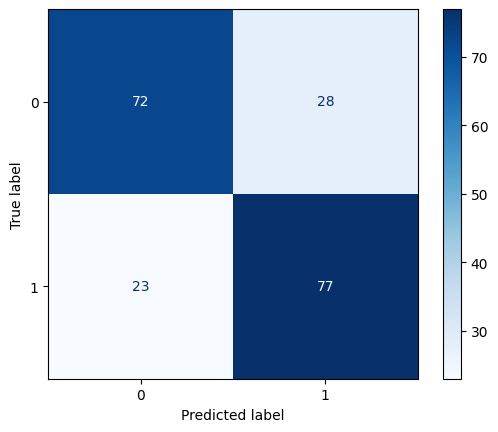

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
        best_clf,
        X_test_vectorized,
        y_test,
        cmap=plt.cm.Blues,
    )

##Using SVM classifier instead of MultinomialNB

In [ ]:
best_accuracy = 0
best_C = None
best_kernel = None
best_gamma = None
best_min_df = None

Cs = [0.1, 1, 10]
kernel_options = ['linear', 'poly', 'rbf', 'sigmoid']
gamma_options = ['scale', 'auto']
min_df_values = [1, 2, 3]

for C in Cs:
    for kernel in kernel_options:
        for gamma in gamma_options:
            for min_df in min_df_values:
                vectorizer_custom_stopwords = CountVectorizer(min_df=min_df, binary=True, lowercase=True, stop_words='english')
                X_train_vectorized = vectorizer_custom_stopwords.fit_transform(X_text_train)
                X_val_vectorized = vectorizer_custom_stopwords.transform(X_text_val)

                clf = SVC(C=C, kernel=kernel, gamma=gamma)
                clf.fit(X_train_vectorized, y_train)

                y_pred_val = clf.predict(X_val_vectorized)
                accuracy_val = accuracy_score(y_val, y_pred_val)

                if accuracy_val > best_accuracy:
                    best_accuracy = accuracy_val
                    best_C = C
                    best_kernel = kernel
                    best_gamma = gamma
                    best_min_df = min_df

print(f'Best C: {best_C}, Best kernel: {best_kernel}, Best gamma: {best_gamma}, Best min_df: {best_min_df}, Best accuracy: {best_accuracy:.3f}')

best_vectorizer = CountVectorizer(min_df=best_min_df, binary=True, lowercase=True, stop_words='english')
X_train_vectorized = best_vectorizer.fit_transform(X_text_train)
best_clf = SVC(C=best_C, kernel=best_kernel, gamma=best_gamma)
best_clf.fit(X_train_vectorized, y_train)

X_test_vectorized = best_vectorizer.transform(X_text_test)
y_pred_test = best_clf.predict(X_test_vectorized)
accuracy_test = accuracy_score(y_test, y_pred_test)
print('Test set accuracy with best parameters: %.3f' % accuracy_test)

Best C: 1, Best kernel: sigmoid, Best gamma: scale, Best min_df: 1, Best accuracy: 0.820
Test set accuracy with best parameters: 0.790


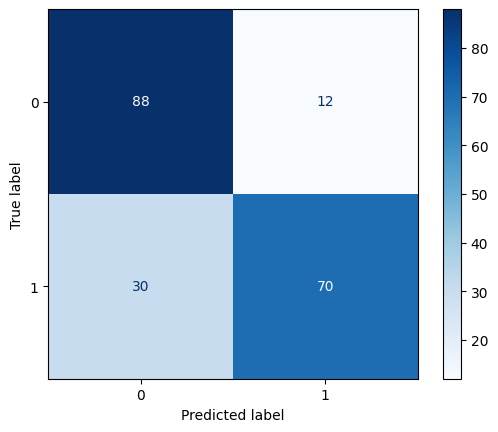

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
        best_clf,
        X_test_vectorized,
        y_test,
        cmap=plt.cm.Blues,
    )

##SentiWord lexicon

In [ ]:
!pip install stanza

In [ ]:
import pandas as pd
import stanza
from sklearn.metrics import accuracy_score

In [ ]:
import csv

def extract_pos(lemma_pos):
    return lemma_pos.split('#')[-1]

with open('SentiWords_1.1.txt', 'r') as infile, open('output_file.csv', 'w', newline='') as outfile:
    reader = csv.reader(infile, delimiter='\t')
    writer = csv.writer(outfile)

    writer.writerow(['lemma', 'prior_polarity_score', 'pos_tag'])

    for row in reader:
        if not row or row[0].startswith('#'):
            continue

        lemma_pos = row[0]
        lemma, pos_tag = lemma_pos.split('#')

        writer.writerow([lemma, row[1], pos_tag])


In [ ]:
df = pd.read_csv('output_file.csv')
print(df.head())
print(df.describe())
print(len(df))
df


         lemma  prior_polarity_score pos_tag
0  .22_caliber               0.00000       a
1  .22_calibre               0.00000       a
2  .22-caliber               0.00000       a
3  .22-calibre               0.00000       a
4          .22               0.12208       n
       prior_polarity_score
count         155287.000000
mean              -0.009101
std                0.128313
min               -0.934890
25%                0.000000
50%                0.000000
75%                0.000000
max                0.894890
155287


,lemma,prior_polarity_score,pos_tag
0,.22_caliber,0.00000,a
1,.22_calibre,0.00000,a
2,.22-caliber,0.00000,a
3,.22-calibre,0.00000,a
4,.22,0.12208,n
...,...,...,...
155282,zymolytic,-0.19821,a
155283,zymosis,0.15754,n
155284,zymotic,-0.08847,a
155285,zymurgy,0.00000,n


##Developing a lexicon-based sentiment classifier using Stanza

In [ ]:
import stanza
stanza.download('en')

INFO:stanza:Downloading default packages for language: en (English) ...


In [ ]:
import stanza
nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma')
text = X_text_val

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


In [ ]:
stanza_lempos = []
nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma')

for sentence_list in text.str.split('\n'):
    for sentence in sentence_list:
        if sentence.strip():
            doc = nlp(sentence)
            stanza_sentence = []

            for sent in doc.sentences:
                for word in sent.words:
                    stanza_sentence.append((word.lemma, word.upos))

            stanza_lempos.append(stanza_sentence)

print(stanza_lempos)


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


[[('waitress', 'NOUN'), ('be', 'AUX'), ('good', 'ADJ'), ('though', 'ADV'), ('!', 'PUNCT')], [('do', 'AUX'), ('not', 'PART'), ('waste', 'VERB'), ('your', 'PRON'), ('time', 'NOUN'), ('here', 'ADV'), ('.', 'PUNCT')], [('I', 'PRON'), ('try', 'VERB'), ('the', 'DET'), ('Cape', 'PROPN'), ('Cod', 'PROPN'), ('ravoli', 'NOUN'), (',', 'PUNCT'), ('chicken', 'NOUN'), (',', 'PUNCT'), ('with', 'ADP'), ('cranberry', 'NOUN'), ('...', 'PUNCT'), ('mmmm', 'INTJ'), ('!', 'PUNCT')], [('our', 'PRON'), ('server', 'NOUN'), ('be', 'AUX'), ('super', 'ADV'), ('nice', 'ADJ'), ('and', 'CCONJ'), ('check', 'VERB'), ('on', 'ADP'), ('we', 'PRON'), ('many', 'ADJ'), ('time', 'NOUN'), ('.', 'PUNCT')], [('extremely', 'ADV'), ('tasty', 'ADJ'), ('!', 'PUNCT')], [('come', 'VERB'), ('hungry', 'ADJ'), (',', 'PUNCT'), ('leave', 'VERB'), ('happy', 'ADJ'), ('and', 'CCONJ'), ('stuff', 'VERB'), ('!', 'PUNCT')], [('the', 'DET'), ('service', 'NOUN'), ('be', 'AUX'), ('not', 'PART'), ('up', 'ADV'), ('to', 'ADP'), ('par', 'NOUN'), (',', 

In [ ]:
def mapping(pos):
  if (pos == 'a'): return 'ADJ'
  if (pos == 'n'): return 'NOUN'
  if(pos == 'r'): return 'ADV'
  if (pos == 'v'): return 'VERB'
  return 0

In [ ]:
csv_lemmas_pos = []
polar = []
with open('output_file.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        csv_lemmas_pos.append((row[0], float(row[1]), row[2]))

matching_pairs = []
total_polar = []
sent_polar = 0
for stanza_sentence in stanza_lempos:
    sent_polar = 0
    for stanza_lemma, stanza_pos in stanza_sentence:
        for csv_lemma, pol, csv_pos in csv_lemmas_pos:
            if stanza_lemma == csv_lemma and stanza_pos == mapping(csv_pos):
                matching_pairs.append((stanza_lemma, stanza_pos, csv_lemma, csv_pos))
                sent_polar += pol
    total_polar.append(sent_polar)


for pair in matching_pairs:
    print(f"Stanza Lemma: {pair[0]}, Stanza POS: {pair[1]}, CSV Lemma: {pair[2]}, CSV POS: {pair[3]}")

Stanza Lemma: waitress, Stanza POS: NOUN, CSV Lemma: waitress, CSV POS: n
Stanza Lemma: good, Stanza POS: ADJ, CSV Lemma: good, CSV POS: a
Stanza Lemma: though, Stanza POS: ADV, CSV Lemma: though, CSV POS: r
Stanza Lemma: waste, Stanza POS: VERB, CSV Lemma: waste, CSV POS: v
Stanza Lemma: time, Stanza POS: NOUN, CSV Lemma: time, CSV POS: n
Stanza Lemma: here, Stanza POS: ADV, CSV Lemma: here, CSV POS: r
Stanza Lemma: try, Stanza POS: VERB, CSV Lemma: try, CSV POS: v
Stanza Lemma: chicken, Stanza POS: NOUN, CSV Lemma: chicken, CSV POS: n
Stanza Lemma: cranberry, Stanza POS: NOUN, CSV Lemma: cranberry, CSV POS: n
Stanza Lemma: server, Stanza POS: NOUN, CSV Lemma: server, CSV POS: n
Stanza Lemma: super, Stanza POS: ADV, CSV Lemma: super, CSV POS: r
Stanza Lemma: nice, Stanza POS: ADJ, CSV Lemma: nice, CSV POS: a
Stanza Lemma: check, Stanza POS: VERB, CSV Lemma: check, CSV POS: v
Stanza Lemma: many, Stanza POS: ADJ, CSV Lemma: many, CSV POS: a
Stanza Lemma: time, Stanza POS: NOUN, CSV Lemm

In [ ]:
print(total_polar)
print(len(total_polar))

[0.74339, -0.46265, 0.39169, 1.54076, 0.8014399999999999, 0.75597, 0.14271, 1.3344200000000002, 2.09672, 1.5743500000000001, 0.74667, 1.3471600000000001, 2.34849, -0.21646000000000004, 1.02153, 0.16631000000000007, -0.59979, 0.8628, 0.44077999999999995, 0.43362, 0.27274, 1.69481, 1.6256599999999999, 1.48678, 2.5912900000000003, -0.7888799999999998, 1.24696, 1.93405, 1.25346, 0.5954699999999999, 1.6859600000000001, 2.60509, 0.72277, 0.63627, 0.47033, 0.62826, 1.4915500000000002, 1.47485, -0.9273899999999999, 0.32447000000000004, 0.02980000000000005, -0.23888, 1.60908, 0.97807, 0.9652, 0.8627, 0.11534, -0.14781, 0.24666, -0.71127, 0.58188, 2.4758099999999996, 1.93118, 0.43247, 0.2797700000000001, -0.12143000000000001, 0.0, -0.13881, -0.21004, 1.4768800000000002, 0.99604, 1.0950600000000001, 1.03125, 0.89885, 0.65792, 0.33332, 1.5407899999999999, 1.16194, 1.8072700000000002, -0.0465799999999999, 1.38839, 0.0, -0.12257, 0.5491600000000001, 0.67672, 0.97198, 0.007410000000000028, 2.30839, 0

In [ ]:
y_val_list = y_val.tolist()
print(y_val_list)

[1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1]


In [ ]:
df = pd.DataFrame()
df['total_polarity'] = total_polar
df['true sentiment'] = y_val_list
print(df['true sentiment'])
df.to_csv('output_with_total_polarity.csv', index=False)
pd.read_csv('output_with_total_polarity.csv')

0     1
1     0
2     1
3     1
4     1
     ..
95    1
96    1
97    0
98    1
99    1
Name: true sentiment, Length: 100, dtype: int64


,total_polarity,true sentiment
0,0.74339,1
1,-0.46265,0
2,0.39169,1
3,1.54076,1
4,0.80144,1
...,...,...
95,0.64445,1
96,0.81348,1
97,0.96066,0
98,2.21633,1


In [ ]:
import numpy as np
best_threshold = None
best_accuracy = 0

for threshold in np.arange(0, 10, 0.01):
    predicted_labels = [1 if polarity >= threshold else 0 for polarity in total_polar]

    accuracy = sum(1 for pred, true in zip(predicted_labels, y_val_list) if pred == true) / len(y_val_list)

    if accuracy > best_accuracy:
        best_threshold = threshold
        best_accuracy = accuracy
        best_pred = predicted_labels

print("Best threshold:", best_threshold)
print("Best accuracy:", best_accuracy)
print("Best preds:", best_pred)
df['predicted sentiment'] = best_pred

df.to_csv('output_for_val_set.csv', index=False)


Best threshold: 0.59
Best accuracy: 0.81
Best preds: [1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]


##Now with the test set

In [ ]:
text = X_text_test
stanza_lempos = []
nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma')

for sentence_list in text.str.split('\n'):
    for sentence in sentence_list:
        if sentence.strip():
            doc = nlp(sentence)
            stanza_sentence = []

            for sent in doc.sentences:
                for word in sent.words:
                    stanza_sentence.append((word.lemma, word.upos))

            stanza_lempos.append(stanza_sentence)

print(stanza_lempos)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


[[('the', 'DET'), ('heart', 'PROPN'), ('attack', 'PROPN'), ('Grill', 'PROPN'), ('in', 'ADP'), ('downtown', 'ADJ'), ('Vegas', 'PROPN'), ('be', 'AUX'), ('a', 'DET'), ('absolutely', 'ADV'), ('flat', 'ADJ'), ('-', 'PUNCT'), ('line', 'VERB'), ('excuse', 'NOUN'), ('for', 'ADP'), ('a', 'DET'), ('restaurant', 'NOUN'), ('.', 'PUNCT')], [('as', 'SCONJ'), ('always', 'ADV'), ('the', 'DET'), ('evening', 'NOUN'), ('be', 'AUX'), ('wonderful', 'ADJ'), ('and', 'CCONJ'), ('the', 'DET'), ('food', 'NOUN'), ('delicious', 'ADJ'), ('!', 'PUNCT')], [('wow', 'INTJ'), ('very', 'ADV'), ('spicy', 'ADJ'), ('but', 'CCONJ'), ('delicious', 'ADJ'), ('.', 'PUNCT')], [('definitely', 'ADV'), ('worth', 'ADJ'), ('venture', 'VERB'), ('off', 'ADP'), ('the', 'DET'), ('strip', 'NOUN'), ('for', 'ADP'), ('the', 'DET'), ('pork', 'NOUN'), ('belly', 'NOUN'), (',', 'PUNCT'), ('will', 'AUX'), ('return', 'VERB'), ('next', 'ADJ'), ('time', 'NOUN'), ('I', 'PRON'), ('be', 'AUX'), ('in', 'ADP'), ('Vegas', 'PROPN'), ('.', 'PUNCT')], [('the

In [ ]:
csv_lemmas_pos = []
polar = []
with open('output_file.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        csv_lemmas_pos.append((row[0], float(row[1]), row[2]))

matching_pairs = []
total_polar = []
sent_polar = 0
for stanza_sentence in stanza_lempos:
    sent_polar = 0
    for stanza_lemma, stanza_pos in stanza_sentence:
        for csv_lemma, pol, csv_pos in csv_lemmas_pos:
            if stanza_lemma == csv_lemma and stanza_pos == mapping(csv_pos):
                matching_pairs.append((stanza_lemma, stanza_pos, csv_lemma, mapping(csv_pos)))
                sent_polar += pol
    total_polar.append(sent_polar)


for pair in matching_pairs:
    print(f"Stanza Lemma: {pair[0]}, Stanza POS: {pair[1]}, CSV Lemma: {pair[2]}, CSV POS: {pair[3]}")

Stanza Lemma: downtown, Stanza POS: ADJ, CSV Lemma: downtown, CSV POS: ADJ
Stanza Lemma: absolutely, Stanza POS: ADV, CSV Lemma: absolutely, CSV POS: ADV
Stanza Lemma: flat, Stanza POS: ADJ, CSV Lemma: flat, CSV POS: ADJ
Stanza Lemma: line, Stanza POS: VERB, CSV Lemma: line, CSV POS: VERB
Stanza Lemma: excuse, Stanza POS: NOUN, CSV Lemma: excuse, CSV POS: NOUN
Stanza Lemma: restaurant, Stanza POS: NOUN, CSV Lemma: restaurant, CSV POS: NOUN
Stanza Lemma: always, Stanza POS: ADV, CSV Lemma: always, CSV POS: ADV
Stanza Lemma: evening, Stanza POS: NOUN, CSV Lemma: evening, CSV POS: NOUN
Stanza Lemma: wonderful, Stanza POS: ADJ, CSV Lemma: wonderful, CSV POS: ADJ
Stanza Lemma: food, Stanza POS: NOUN, CSV Lemma: food, CSV POS: NOUN
Stanza Lemma: delicious, Stanza POS: ADJ, CSV Lemma: delicious, CSV POS: ADJ
Stanza Lemma: very, Stanza POS: ADV, CSV Lemma: very, CSV POS: ADV
Stanza Lemma: spicy, Stanza POS: ADJ, CSV Lemma: spicy, CSV POS: ADJ
Stanza Lemma: delicious, Stanza POS: ADJ, CSV Lemma

In [ ]:
csv_lemmas_pos = []
with open('output_file.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        csv_lemmas_pos.append((row[0], row[2]))

matching_pairs = []
for stanza_sentence in stanza_lempos:
    for stanza_lemma, stanza_pos in stanza_sentence:
        matched = False
        for csv_lemma, csv_pos in csv_lemmas_pos:
            if stanza_lemma == csv_lemma and stanza_pos == mapping(csv_pos):
                matched = True
                break
        if not matched:
            print(f"Stanza Lemma: {stanza_lemma}, Stanza POS: {stanza_pos}, Unmatched: True")



Stanza Lemma: the, Stanza POS: DET, Unmatched: True
Stanza Lemma: heart, Stanza POS: PROPN, Unmatched: True
Stanza Lemma: attack, Stanza POS: PROPN, Unmatched: True
Stanza Lemma: Grill, Stanza POS: PROPN, Unmatched: True
Stanza Lemma: in, Stanza POS: ADP, Unmatched: True
Stanza Lemma: Vegas, Stanza POS: PROPN, Unmatched: True
Stanza Lemma: be, Stanza POS: AUX, Unmatched: True
Stanza Lemma: a, Stanza POS: DET, Unmatched: True
Stanza Lemma: -, Stanza POS: PUNCT, Unmatched: True
Stanza Lemma: for, Stanza POS: ADP, Unmatched: True
Stanza Lemma: a, Stanza POS: DET, Unmatched: True
Stanza Lemma: ., Stanza POS: PUNCT, Unmatched: True
Stanza Lemma: as, Stanza POS: SCONJ, Unmatched: True
Stanza Lemma: the, Stanza POS: DET, Unmatched: True
Stanza Lemma: be, Stanza POS: AUX, Unmatched: True
Stanza Lemma: and, Stanza POS: CCONJ, Unmatched: True
Stanza Lemma: the, Stanza POS: DET, Unmatched: True
Stanza Lemma: !, Stanza POS: PUNCT, Unmatched: True
Stanza Lemma: wow, Stanza POS: INTJ, Unmatched: Tru

In [ ]:
y_test_list = y_test.tolist()
df = pd.DataFrame()
df['total_polarity'] = total_polar
df['true sentiment'] = y_test_list
df.to_csv('output_for_test_set.csv', index=False)
pd.read_csv('output_for_test_set.csv')

,total_polarity,true sentiment
0,-0.01039,0
1,1.94411,1
2,0.98303,1
3,0.75098,1
4,0.38749,1
...,...,...
195,2.03953,1
196,0.93426,1
197,0.39579,0
198,-0.37959,1


In [ ]:
import numpy as np
threshold = best_threshold
best_accuracy = 0

predicted_labels = [1 if polarity >= threshold else 0 for polarity in total_polar]

accuracy = sum(1 for pred, true in zip(predicted_labels, y_test_list) if pred == true) / len(y_test_list)

print("Preds:", predicted_labels)
print("Accuracy:", accuracy)
df['predicted sentiment'] = predicted_labels

df.to_csv('output_for_test_set.csv', index=False)

Preds: [0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1]
Accuracy: 0.735
